<a href="https://colab.research.google.com/github/AKG1301/Exploratory-Data-Analysis-on-Geolocational-Data/blob/main/Exploratory_Data_Analysis_on_Geolocational_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Analysis of Geolocational Data

## Data Collection 

In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/  Exploratory Analysis of Geolocational Data/food_coded.csv")

In [ ]:
data

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,3.0,2,1.0,"My diet consists mainly of coffee, water, frui...",2,2.0,I have noticed there is less time for a prepar...,1,3,2,1.0,4,2.0,4.0,Accountant,Italian,1,1.0,Stromboli Mac and Cheese and Pizza,1,5,4,5,5,mainly protein and vegetables with a complex c...,My ideal diet would consist of a majority of w...,6,4.0,3,5,7.0,1.0,"pasta, fish, steak",3.0,Radiological Technician,5,3.0,1,4,3.0

#Data Cleaning

The process of Extracting the features, (and dealing with different kinds of values as well as NaN values) is known as Data Cleaning.

In [ ]:
data.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [ ]:
column=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']

In [ ]:
d=data[column]

In [ ]:
d

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,NaN,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3


## Data Exploration and Visualisation




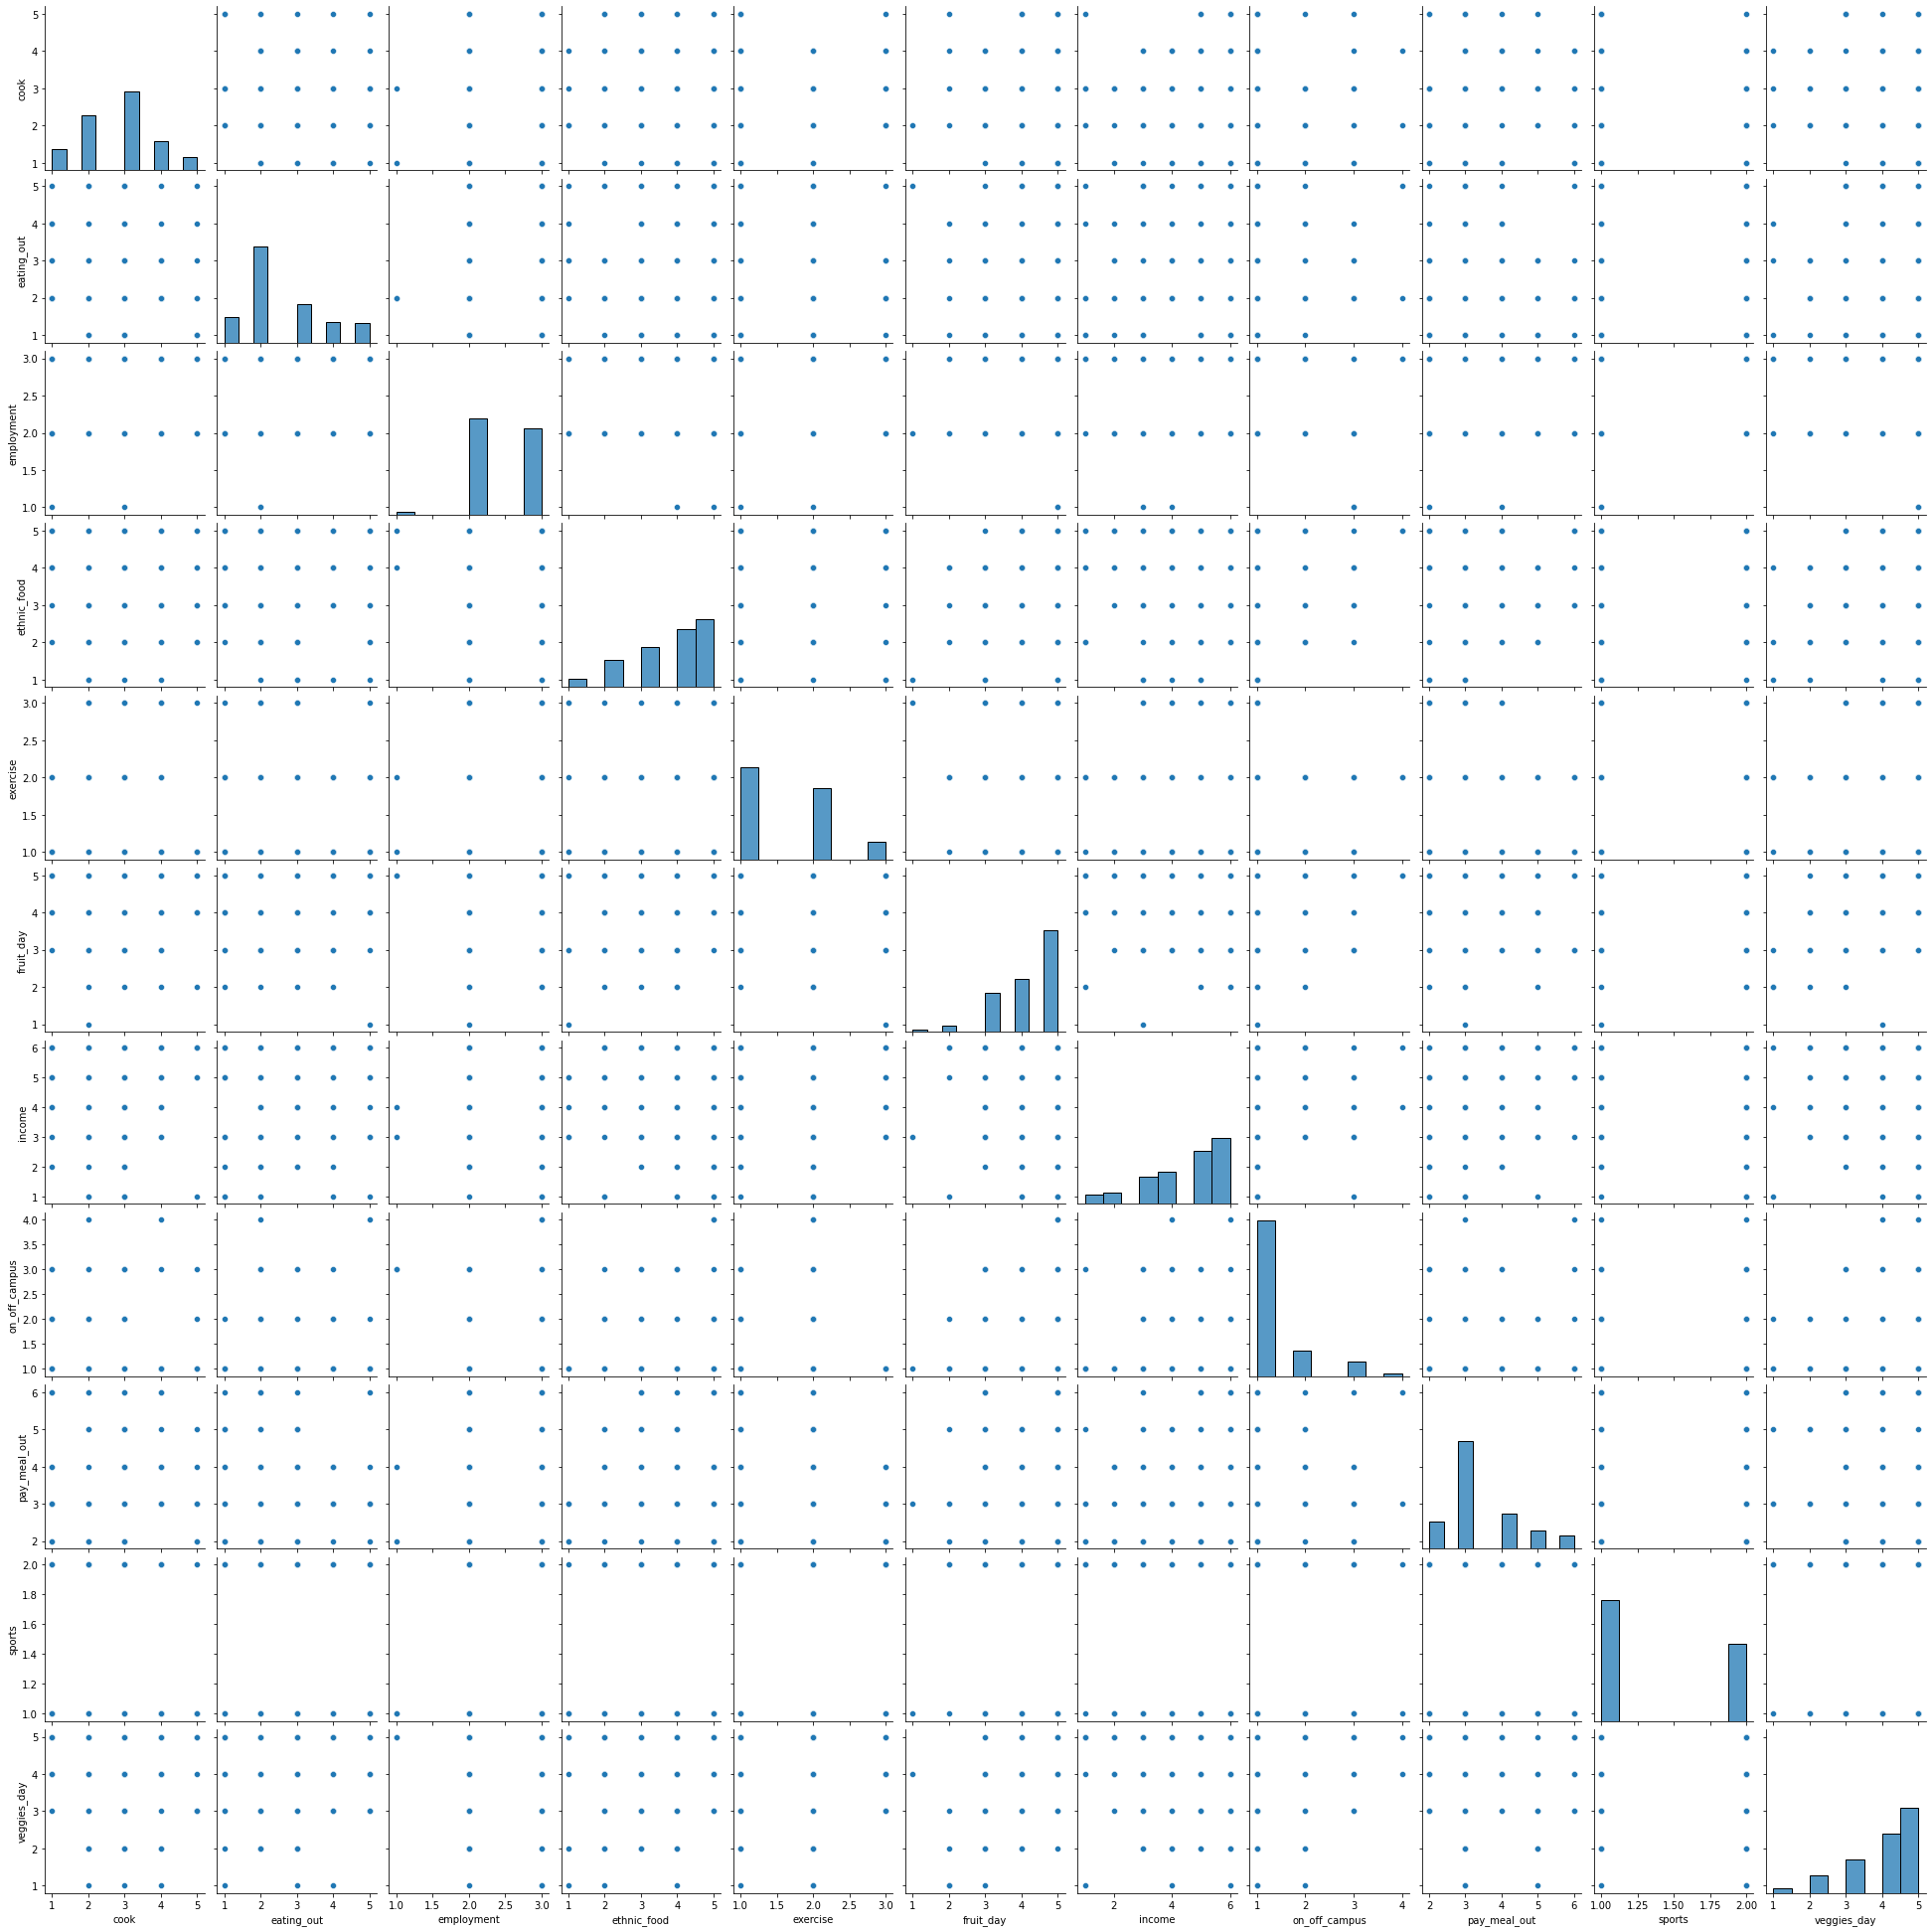

In [ ]:
import seaborn as sns
sns.pairplot(d)

#Boxplot of Dataset

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[Text(0, 0, 'cook'),
 Text(0, 0, 'eating_out'),
 Text(0, 0, 'employment'),
 Text(0, 0, 'ethnic_food'),
 Text(0, 0, 'exercise'),
 Text(0, 0, 'fruit_day'),
 Text(0, 0, 'income'),
 Text(0, 0, 'on_off_campus'),
 Text(0, 0, 'pay_meal_out'),
 Text(0, 0, 'sports'),
 Text(0, 0, 'veggies_day')]

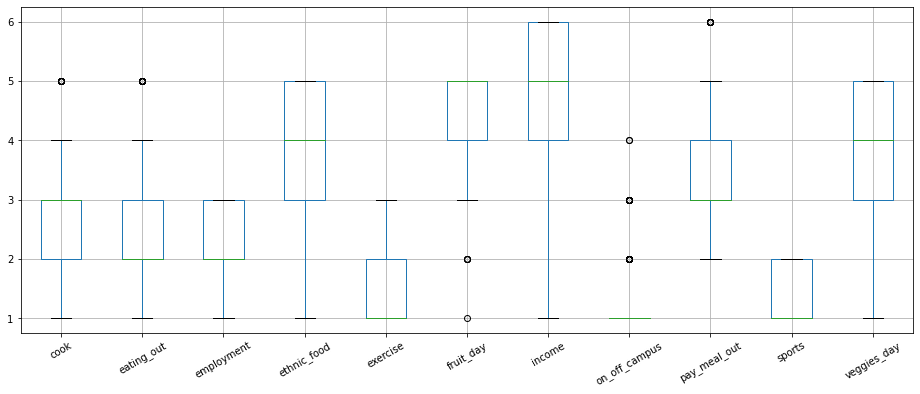

In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
% matplotlib inline 
ax=d.boxplot(figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [ ]:
d.shape

(125, 11)

In [ ]:
s=d.dropna()

## Run KMeans Clustering on the data

In [ ]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy
## for deep learning
import minisom

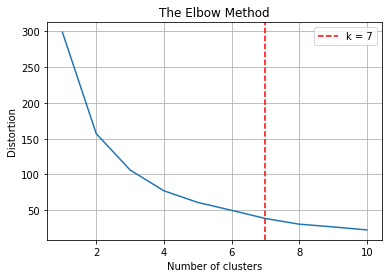

In [ ]:
f=['cook','income']
X = s[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

## Get Geolocational Data

In [ ]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
CLIENT_ID = "KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF" # your Foursquare ID
CLIENT_SECRET = "KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR" # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    17.448372, 78.526957,
    30000, 
    LIMIT)

In [ ]:
results = requests.get(url).json()

In [ ]:
results

{'meta': {'code': 200, 'requestId': '6056002a89267750fde0b2b5'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-513afb90e4b04d69fd7cc3c7-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1c4941735',
         'name': 'Restaurant',
         'pluralName': 'Restaurants',
         'primary': True,
         'shortName': 'Restaurant'}],
       'id': '513afb90e4b04d69fd7cc3c7',
       'location': {'address': 'Opposite Hussain Sagar Lake',
        'cc': 'IN',
        'city': 'Hyderabad',
        'country': 'India',
        'crossStreet': 'Tank Bund Road',
        'distance': 5024,
        'formattedAddress': ['Opposite Hussain Sagar Lake (Tank Bund Road)',
         'Hyderabad 500080',
         'Telangana',

In [ ]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-513afb90e4b04d69fd7cc3c7-0,0,"[{'summary': 'This spot is popular', 'type': '...",513afb90e4b04d69fd7cc3c7,Okra Restaurant,Opposite Hussain Sagar Lake,Tank Bund Road,17.423817,78.487257,"[{'label': 'display', 'lat': 17.42381662594691...",5024,500080,IN,Hyderabad,Telangana,India,"[Opposite Hussain Sagar Lake (Tank Bund Road),...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN,NaN
1,e-0-4c1f7229b306c928046b68b7-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c1f7229b306c928046b68b7,Fifth Avenue Bakers,Sainikpuri,NaN,17.487673,78.542793,"[{'label': 'display', 'lat': 17.48767334633119...",4687,NaN,IN,NaN,Andhra Pradesh,India,"[Sainikpuri, Andhra Pradesh, India]","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN
2,e-0-50ab6b0ae4b0ade3441de450-2,0,"[{'summary': 'This spot is popular', 'type': '...",50ab6b0ae4b0ade3441de450,Dimmy pan palace,sindhi colony,sindhi colony road,17.440081,78.484293,"[{'label': 'display', 'lat': 17.44008112919533...",4623,500040,IN,Hyderabad,Telangana,India,"[sindhi colony (sindhi colony road), Hyderabad...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN
3,e-0-4f66024de4b0777dfdc91dde-3,0,"[{'summary': 'This spot is popular', 'type': '...",4f66024de4b0777dfdc91dde,Cream Stone Concepts,Himayathnagar,NaN,17.404284,78.481458,"[{'label': 'display', 'lat': 17.40428360291939...",6887,500029,IN,Hyderabad,Telangana,India,"[Himayathnagar, Hyderabad 500029, Telangana, I...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN
4,e-0-4df9c65c62e1e9a24367f9e5-4,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,Narayanguda-himayat Nagar X Roads,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",6693,500029,IN,Hyderabad,Telangana,India,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-512cadf5e4b0a8adf52993b6-95,0,"[{'summary': 'This spot is popular', 'type': '...",512cadf5e4b0a8adf52993b6,Moon Bean Cafe,NaN,NaN,17.368964,78.517230,"[{'label': 'display', 'lat': 17.36896379960833...",8899,NaN,IN,Hyderabad,Telangana,India,"[Hyderabad, Telangana, India]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN
96,e-0-4c81163ad92ea093375a3d72-96,0,"[{'summary': 'This spot is popular', 'type': '...",4c81163ad92ea093375a3d72,Shah Ghouse Cafe and Restaurant,Toli Chowli,M,17.396277,78.425094,"[{'label': 'display', 'lat': 17.3962770409263,...",12275,500058,IN,Hyderabad,Telangana,India,"[Toli Chowli (M), Hyderabad 500058, Telangana,...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN
97,e-0-5385efc5498e95906611fb32-97,0,"[{'summary': 'This spot is popular', 'type': '...",5385efc5498e95906611fb32,Ci Gusta,"Plot 66, Jyothi Celeste, Kavuri Hills, Madhapur",Kavuri Hills,17.438342,78.395606,"[{'label': 'display', 'lat': 17.4383416111169,...",13994,500081,IN,Hyderabad,Telangana,India,"[Plot 66, Jyothi Celeste, Kavuri Hills, Madhap...","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],NaN,Madhapur
98,e-0-5c0413f7724750002cd8f006-98,0,"[{'summary': 'This spot is popular', 'type': '...",5c0413f7724750002cd8f006,Amb Cinemas,Kondapur,NaN,17.457379,78.363723,"[{'label': 'display', 'lat': 17.45737932852447...",17363,500084,IN,Hyderabad,TG,India,"[Kondapur, Hyderabad 500084, TG, India]","[{'id': '4bf58dd8d48988d17f941735', 'name': 'M...",0,[],NaN,Kondapur


In [ ]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-513afb90e4b04d69fd7cc3c7-0,0,"[{'summary': 'This spot is popular', 'type': '...",513afb90e4b04d69fd7cc3c7,Okra Restaurant,Opposite Hussain Sagar Lake,Tank Bund Road,17.423817,78.487257,"[{'label': 'display', 'lat': 17.42381662594691...",5024,500080,IN,Hyderabad,Telangana,India,"[Opposite Hussain Sagar Lake (Tank Bund Road),...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN,NaN
1,e-0-4c1f7229b306c928046b68b7-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c1f7229b306c928046b68b7,Fifth Avenue Bakers,Sainikpuri,NaN,17.487673,78.542793,"[{'label': 'display', 'lat': 17.48767334633119...",4687,NaN,IN,NaN,Andhra Pradesh,India,"[Sainikpuri, Andhra Pradesh, India]","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN
2,e-0-50ab6b0ae4b0ade3441de450-2,0,"[{'summary': 'This spot is popular', 'type': '...",50ab6b0ae4b0ade3441de450,Dimmy pan palace,sindhi colony,sindhi colony road,17.440081,78.484293,"[{'label': 'display', 'lat': 17.44008112919533...",4623,500040,IN,Hyderabad,Telangana,India,"[sindhi colony (sindhi colony road), Hyderabad...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN
3,e-0-4f66024de4b0777dfdc91dde-3,0,"[{'summary': 'This spot is popular', 'type': '...",4f66024de4b0777dfdc91dde,Cream Stone Concepts,Himayathnagar,NaN,17.404284,78.481458,"[{'label': 'display', 'lat': 17.40428360291939...",6887,500029,IN,Hyderabad,Telangana,India,"[Himayathnagar, Hyderabad 500029, Telangana, I...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN
4,e-0-4df9c65c62e1e9a24367f9e5-4,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,Narayanguda-himayat Nagar X Roads,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",6693,500029,IN,Hyderabad,Telangana,India,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-512cadf5e4b0a8adf52993b6-95,0,"[{'summary': 'This spot is popular', 'type': '...",512cadf5e4b0a8adf52993b6,Moon Bean Cafe,NaN,NaN,17.368964,78.517230,"[{'label': 'display', 'lat': 17.36896379960833...",8899,NaN,IN,Hyderabad,Telangana,India,"[Hyderabad, Telangana, India]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN
96,e-0-4c81163ad92ea093375a3d72-96,0,"[{'summary': 'This spot is popular', 'type': '...",4c81163ad92ea093375a3d72,Shah Ghouse Cafe and Restaurant,Toli Chowli,M,17.396277,78.425094,"[{'label': 'display', 'lat': 17.3962770409263,...",12275,500058,IN,Hyderabad,Telangana,India,"[Toli Chowli (M), Hyderabad 500058, Telangana,...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN
97,e-0-5385efc5498e95906611fb32-97,0,"[{'summary': 'This spot is popular', 'type': '...",5385efc5498e95906611fb32,Ci Gusta,"Plot 66, Jyothi Celeste, Kavuri Hills, Madhapur",Kavuri Hills,17.438342,78.395606,"[{'label': 'display', 'lat': 17.4383416111169,...",13994,500081,IN,Hyderabad,Telangana,India,"[Plot 66, Jyothi Celeste, Kavuri Hills, Madhap...","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],NaN,Madhapur
98,e-0-5c0413f7724750002cd8f006-98,0,"[{'summary': 'This spot is popular', 'type': '...",5c0413f7724750002cd8f006,Amb Cinemas,Kondapur,NaN,17.457379,78.363723,"[{'label': 'display', 'lat': 17.45737932852447...",17363,500084,IN,Hyderabad,TG,India,"[Kondapur, Hyderabad 500084, TG, India]","[{'id': '4bf58dd8d48988d17f941735', 'name': 'M...",0,[],NaN,Kondapur


## Adding two more Columns Restaurant and Others
 

1.   Restaurant: Number of Restaurant in the radius of 20 km
2.   others:Number of Gyms, Parks,etc in the radius of 20 km




In [ ]:
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood,restaurant,others
0,e-0-513afb90e4b04d69fd7cc3c7-0,0,"[{'summary': 'This spot is popular', 'type': '...",513afb90e4b04d69fd7cc3c7,Okra Restaurant,Opposite Hussain Sagar Lake,Tank Bund Road,17.423817,78.487257,"[{'label': 'display', 'lat': 17.42381662594691...",5024,500080,IN,Hyderabad,Telangana,India,"[Opposite Hussain Sagar Lake (Tank Bund Road),...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN,NaN,6,9
1,e-0-4c1f7229b306c928046b68b7-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c1f7229b306c928046b68b7,Fifth Avenue Bakers,Sainikpuri,NaN,17.487673,78.542793,"[{'label': 'display', 'lat': 17.48767334633119...",4687,NaN,IN,NaN,Andhra Pradesh,India,"[Sainikpuri, Andhra Pradesh, India]","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN,5,1
2,e-0-50ab6b0ae4b0ade3441de450-2,0,"[{'summary': 'This spot is popular', 'type': '...",50ab6b0ae4b0ade3441de450,Dimmy pan palace,sindhi colony,sindhi colony road,17.440081,78.484293,"[{'label': 'display', 'lat': 17.44008112919533...",4623,500040,IN,Hyderabad,Telangana,India,"[sindhi colony (sindhi colony road), Hyderabad...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN,34,17
3,e-0-4f66024de4b0777dfdc91dde-3,0,"[{'summary': 'This spot is popular', 'type': '...",4f66024de4b0777dfdc91dde,Cream Stone Concepts,Himayathnagar,NaN,17.404284,78.481458,"[{'label': 'display', 'lat': 17.40428360291939...",6887,500029,IN,Hyderabad,Telangana,India,"[Himayathnagar, Hyderabad 500029, Telangana, I...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN,28,11
4,e-0-4df9c65c62e1e9a24367f9e5-4,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,Narayanguda-himayat Nagar X Roads,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",6693,500029,IN,Hyderabad,Telangana,India,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,NaN,24,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-512cadf5e4b0a8adf52993b6-95,0,"[{'summary': 'This spot is popular', 'type': '...",512cadf5e4b0a8adf52993b6,Moon Bean Cafe,NaN,NaN,17.368964,78.517230,"[{'label': 'display', 'lat': 17.36896379960833...",8899,NaN,IN,Hyderabad,Telangana,India,"[Hyderabad, Telangana, India]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,6,4
96,e-0-4c81163ad92ea093375a3d72-96,0,"[{'summary': 'This spot is popular', 'type': '...",4c81163ad92ea093375a3d72,Shah Ghouse Cafe and Restaurant,Toli Chowli,M,17.396277,78.425094,"[{'label': 'display', 'lat': 17.3962770409263,...",12275,500058,IN,Hyderabad,Telangana,India,"[Toli Chowli (M), Hyderabad 500058, Telangana,...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,16,1
97,e-0-5385efc5498e95906611fb32-97,0,"[{'summary': 'This spot is popular', 'type': '...",5385efc5498e95906611fb32,Ci Gusta,"Plot 66, Jyothi Celeste, Kavuri Hills, Madhapur",Kavuri Hills,17.438342,78.395606,"[{'label': 'display', 'lat': 17.4383416111169,...",13994,500081,IN,Hyderabad,Telangana,India,"[Plot 66, Jyothi Celeste, Kavuri Hills, Madhap...","[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",0,[],NaN,Madhapur,40,16
98,e-0-5c0413f7724750002cd8f006-98,0,"[{'summary': 'This spot is popular', 'type': '...",5c0413f7724750002cd8f006,Amb Cinemas,Kondapur,NaN,17.457379,78.363723,"[{'label': 'display', 'lat': 17.45737932852447...",17363,500084,IN,Hyderabad,TG,India,"[Kondapur, Hyderabad 500084, TG, India]","[{'id': '4bf58

## Changing the Column Name

In [ ]:
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

## Install the minisom library using pip

MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM). SOM is a type of Artificial Neural Network able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display. Minisom is designed to allow researchers to easily build on top of it and to give students the ability to quickly grasp its details.

In [ ]:
pip install minisom

## Run K Means clustering on the dataset, with the optimal K value using Elbow Method

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

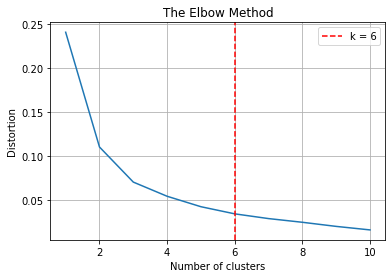

In [ ]:
f=['venue.location.lat','venue.location.lng']
X = nearby_venues[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
city = "Hyderabad"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Hyderabad, Bahadurpura mandal, Hyderabad, Telangana, India
[lat, long]: [17.360589, 78.4740613]


In [ ]:
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood,restaurant,others
0,e-0-513afb90e4b04d69fd7cc3c7-0,0,"[{'summary': 'This spot is popular', 'type': '...",513afb90e4b04d69fd7cc3c7,Okra Restaurant,Opposite Hussain Sagar Lake,Tank Bund Road,17.423817,78.487257,"[{'label': 'display', 'lat': 17.42381662594691...",5024,500080,IN,Hyderabad,Telangana,India,"[Opposite Hussain Sagar Lake (Tank Bund Road),...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN,NaN,6,9
1,e-0-4c1f7229b306c928046b68b7-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c1f7229b306c928046b68b7,Fifth Avenue Bakers,Sainikpuri,NaN,17.487673,78.542793,"[{'label': 'display', 'lat': 17.48767334633119...",4687,NaN,IN,NaN,Andhra Pradesh,India,"[Sainikpuri, Andhra Pradesh, India]","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN,5,1
2,e-0-50ab6b0ae4b0ade3441de450-2,0,"[{'summary': 'This spot is popular', 'type': '...",50ab6b0ae4b0ade3441de450,Dimmy pan palace,sindhi colony,sindhi colony road,17.440081,78.484293,"[{'label': 'display', 'lat': 17.44008112919533...",4623,500040,IN,Hyderabad,Telangana,India,"[sindhi colony (sindhi colony road), Hyderabad...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN,34,17
3,e-0-4f66024de4b0777dfdc91dde-3,0,"[{'summary': 'This spot is popular', 'type': '...",4f66024de4b0777dfdc91dde,Cream Stone Concepts,Himayathnagar,NaN,17.404284,78.481458,"[{'label': 'display', 'lat': 17.40428360291939...",6887,500029,IN,Hyderabad,Telangana,India,"[Himayathnagar, Hyderabad 500029, Telangana, I...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN,28,11
4,e-0-4df9c65c62e1e9a24367f9e5-4,0,"[{'summary': 'This spot is popular', 'type': '...",4df9c65c62e1e9a24367f9e5,King & Cardinal,Himayatnagar,Narayanguda-himayat Nagar X Roads,17.400678,78.488575,"[{'label': 'display', 'lat': 17.40067830505242...",6693,500029,IN,Hyderabad,Telangana,India,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],NaN,NaN,24,13


In [ ]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups', 'venue.venuePage.id',
       'venue.location.neighborhood', 'restaurant', 'others'],
      dtype='object')

##Data Cleaning Process for Extracting Necessary Columns in the Dataset

In [ ]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.location.neighborhood',	'venue.venuePage.id',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [ ]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

##New Dataset

In [ ]:
n

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others
0,17.423817,78.487257,"[Opposite Hussain Sagar Lake (Tank Bund Road),...",6,9
1,17.487673,78.542793,"[Sainikpuri, Andhra Pradesh, India]",5,1
2,17.440081,78.484293,"[sindhi colony (sindhi colony road), Hyderabad...",34,17
3,17.404284,78.481458,"[Himayathnagar, Hyderabad 500029, Telangana, I...",28,11
4,17.400678,78.488575,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,24,13
...,...,...,...,...,...
95,17.368964,78.517230,"[Hyderabad, Telangana, India]",6,4
96,17.396277,78.425094,"[Toli Chowli (M), Hyderabad 500058, Telangana,...",16,1
97,17.438342,78.395606,"[Plot 66, Jyothi Celeste, Kavuri Hills, Madhap...",40,16
98,17.457379,78.363723,"[Kondapur, Hyderabad 500084, TG, India]",29,12


## Dropping Nan Values from Dataset

In [ ]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,17.423817,78.487257,"[Opposite Hussain Sagar Lake (Tank Bund Road),...",6,9
1,17.487673,78.542793,"[Sainikpuri, Andhra Pradesh, India]",5,1
2,17.440081,78.484293,"[sindhi colony (sindhi colony road), Hyderabad...",34,17
3,17.404284,78.481458,"[Himayathnagar, Hyderabad 500029, Telangana, I...",28,11
4,17.400678,78.488575,[Himayatnagar (Narayanguda-himayat Nagar X Roa...,24,13
...,...,...,...,...,...
95,17.368964,78.517230,"[Hyderabad, Telangana, India]",6,4
96,17.396277,78.425094,"[Toli Chowli (M), Hyderabad 500058, Telangana,...",16,1
97,17.438342,78.395606,"[Plot 66, Jyothi Celeste, Kavuri Hills, Madhap...",40,16
98,17.457379,78.363723,"[Kondapur, Hyderabad 500084, TG, India]",29,12


###Convert Every Row of Column ***'venue.location.formattedAddress'*** from List to String

In [ ]:
n['venue.location.formattedAddress']

0     [Opposite Hussain Sagar Lake (Tank Bund Road),...
1                   [Sainikpuri, Andhra Pradesh, India]
2     [sindhi colony (sindhi colony road), Hyderabad...
3     [Himayathnagar, Hyderabad 500029, Telangana, I...
4     [Himayatnagar (Narayanguda-himayat Nagar X Roa...
                            ...                        
95                        [Hyderabad, Telangana, India]
96    [Toli Chowli (M), Hyderabad 500058, Telangana,...
97    [Plot 66, Jyothi Celeste, Kavuri Hills, Madhap...
98              [Kondapur, Hyderabad 500084, TG, India]
99    [Level 10, SLN Terminus, Hyderabad 500081, Tel...
Name: venue.location.formattedAddress, Length: 100, dtype: object

In [ ]:
spec_chars = ["[","]"]
for char in spec_chars:
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')


In [ ]:
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,17.423817,78.487257,'Opposite Hussain Sagar Lake (Tank Bund Road)...,6,9
1,17.487673,78.542793,"'Sainikpuri', 'Andhra Pradesh', 'India'",5,1
2,17.440081,78.484293,"'sindhi colony (sindhi colony road)', 'Hydera...",34,17
3,17.404284,78.481458,"'Himayathnagar', 'Hyderabad 500029', 'Telanga...",28,11
4,17.400678,78.488575,'Himayatnagar (Narayanguda-himayat Nagar X Ro...,24,13
...,...,...,...,...,...
95,17.368964,78.517230,"'Hyderabad', 'Telangana', 'India'",6,4
96,17.396277,78.425094,"'Toli Chowli (M)', 'Hyderabad 500058', 'Telan...",16,1
97,17.438342,78.395606,"'Plot 66, Jyothi Celeste, Kavuri Hills, Madha...",40,16
98,17.457379,78.363723,"'Kondapur', 'Hyderabad 500084', 'TG', 'India'",29,12


#Plot the clustered locations on a map

In [ ]:
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = n.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(n[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


## plot the map
map_

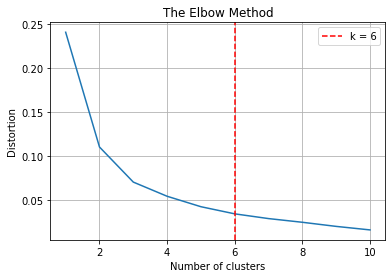

In [ ]:
X = n[["lat","long"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()


In [ ]:
k = 6
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = n[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
n

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,lat,long,venue.location.formattedAddress,restaurant,others,cluster,centroids
0,17.423817,78.487257,'Opposite Hussain Sagar Lake (Tank Bund Road)...,6,9,1,0
1,17.487673,78.542793,"'Sainikpuri', 'Andhra Pradesh', 'India'",5,1,3,1
2,17.440081,78.484293,"'sindhi colony (sindhi colony road)', 'Hydera...",34,17,4,0
3,17.404284,78.481458,"'Himayathnagar', 'Hyderabad 500029', 'Telanga...",28,11,1,0
4,17.400678,78.488575,'Himayatnagar (Narayanguda-himayat Nagar X Ro...,24,13,1,0
...,...,...,...,...,...,...,...
95,17.368964,78.517230,"'Hyderabad', 'Telangana', 'India'",6,4,5,0
96,17.396277,78.425094,"'Toli Chowli (M)', 'Hyderabad 500058', 'Telan...",16,1,0,0
97,17.438342,78.395606,"'Plot 66, Jyothi Celeste, Kavuri Hills, Madha...",40,16,2,0
98,17.457379,78.363723,"'Kondapur', 'Hyderabad 500084', 'TG', 'India'",29,12,2,0


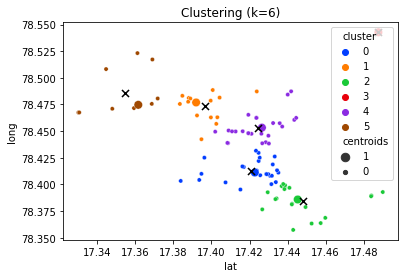

In [ ]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [ ]:
model = cluster.AffinityPropagation()


Text(0.5, 1.0, 'Clustering (k=6)')

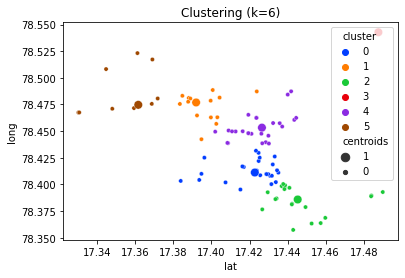

In [ ]:
k = n["cluster"].nunique()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [ ]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = n.copy()
## create color column
lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_

## ***Thankyou***